# Part 1: Working with Regex

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib
import re

In [2]:
pattern = r"\d{10}"
text_to_search = "Hello my name is sebastien, you can call me on 0664533519. See you!"
re.findall(pattern, text_to_search)

['0664533519']

In [3]:
zip_code_pattern = r"\d{5}"
text = "I moved to Paris 75011, it's closer to my workplace."
re.findall(pattern, text)

[]

In [4]:
pattern = r"date of"
text_to_search = "The date of creation is 2019/03/12 and date of expiration is 2021/03/01"
re.findall(pattern, text_to_search)

['date of', 'date of']

In [5]:
date_pattern = r"\d{4}/\d{2}/\d{2}"
text_to_search = "The date of creation is 2019/03/12 and date of expiration is 2021/03/01"
re.findall(pattern, text_to_search)

['date of', 'date of']

In [6]:
date_pattern = r"\d{2}-\d{2}-\d{4}"
text = "Receipt Number 103402 ||| 15-02-2017"
re.findall(pattern, text)

[]

In [7]:
pattern = r"Receipt Number (\d+)"
text_to_search = "Receipt Number 103402 ||| 15-02-2017"
re.findall(pattern, text_to_search)

['103402']

In [8]:
quantity_pattern = r"Quantity +\d+"

In [9]:
amount_pattern = r"Total Amount +\d+\.\d{2} €"

In [10]:
quantity_group_pattern = r"Quantity +(\d+)"
text = "Quantity              32"
re.findall(quantity_group_pattern, text)

['32']

In [11]:
amount_group_pattern = r"Total Amount +(\d+.\d{2}) €"
text = "Total Amount               3097.00 €"
re.findall(amount_group_pattern, text)

['3097.00']

In [12]:
from nbresult import ChallengeResult

result = ChallengeResult('patterns',
    zipcode_re=zip_code_pattern,
    date_re=date_pattern,
    quantity_re=quantity_pattern,
                         
    amount_re=amount_pattern,
    quantity_grp_re=quantity_group_pattern,
    amount_grp_re=amount_group_pattern
)
result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /Users/humbert/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/humbert/code/HumbertMonnot/data-challenges/02-Data-Toolkit/02-Data-Sourcing/03-Text-Extraction-with-Regex
plugins: anyio-3.4.0, dash-2.0.0
collecting ... collected 6 items

tests/test_patterns.py::TestPatterns::test_amount_group_pattern PASSED   [ 16%]
tests/test_patterns.py::TestPatterns::test_amount_pattern PASSED         [ 33%]
tests/test_patterns.py::TestPatterns::test_date_pattern PASSED           [ 50%]
tests/test_patterns.py::TestPatterns::test_quantity_group_pattern PASSED [ 66%]
tests/test_patterns.py::TestPatterns::test_quantity_pattern PASSED       [ 83%]
tests/test_patterns.py::TestPatterns::test_zip_code_pattern PASSED       [100%]

============================== 6 passed in 0.02s ===============================


💯 You can commit

# Part 2: From a text file to a DataFrame

In [13]:
filepath = "data/receipts.txt"
with open(filepath, encoding="utf-8") as f:
    receipts_str = f.read()

In [14]:
print(receipts_str[:500])




Receipt Number 102790 ||| 02-01-2017 
------------------------------------

Quantity                         163
Total Amount               3097.00 €

************************************


Receipt Number 102862 ||| 05-01-2017 
------------------------------------

Quantity                         110
Total Amount                935.00 €

************************************


Receipt Number 103086 ||| 23-01-2017 
-----


In [15]:
receipts_list = receipts_str.split("====================================\n************************************")

In [16]:
len(receipts_list)

100

In [17]:
receipts_dict = {
    "date": [],
    "quantity": [],
    "amount": []
}
for receipt in receipts_list:
    receipts_dict["date"].append(re.findall(date_pattern, receipt)[0])
    receipts_dict["quantity"].append(re.findall(quantity_group_pattern, receipt)[0])
    receipts_dict["amount"].append(re.findall(amount_group_pattern, receipt)[0])

In [18]:
from pprint import pprint
pprint(receipts_dict)

{'amount': ['3097.00',
            '935.00',
            '2808.00',
            '4368.00',
            '1988.50',
            '3586.00',
            '5017.50',
            '2756.00',
            '3060.00',
            '2686.00',
            '2584.00',
            '2835.00',
            '2613.00',
            '3344.00',
            '2847.00',
            '4475.00',
            '1660.00',
            '2164.50',
            '2115.00',
            '3375.00',
            '1595.00',
            '4600.00',
            '4753.00',
            '1390.50',
            '4611.00',
            '3021.00',
            '3577.50',
            '1342.00',
            '6016.50',
            '1269.00',
            '3085.50',
            '1891.50',
            '3569.00',
            '3850.00',
            '3312.00',
            '4735.50',
            '2945.00',
            '4116.00',
            '2310.00',
            '1998.00',
            '4379.00',
            '3373.50',
            '4444.00',
            

In [19]:
receipts_df = pd.DataFrame(receipts_dict)
receipts_df

,date,quantity,amount
0,02-01-2017,163,3097.00
1,05-01-2017,110,935.00
2,23-01-2017,156,2808.00
3,31-01-2017,182,4368.00
4,06-02-2017,97,1988.50
...,...,...,...
95,09-10-2017,121,1936.00
96,12-10-2017,179,4743.50
97,26-10-2017,108,2484.00
98,12-12-2017,193,2605.50


In [20]:
from nbresult import ChallengeResult

result = ChallengeResult('receipts',
    raw=receipts_list,
    receipts=receipts_dict,
    df_size=receipts_df.shape,
    receipt=receipts_df.iloc[-1, :]
)
result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.12, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /Users/humbert/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/humbert/code/HumbertMonnot/data-challenges/02-Data-Toolkit/02-Data-Sourcing/03-Text-Extraction-with-Regex
plugins: anyio-3.4.0, dash-2.0.0
collecting ... collected 4 items

tests/test_receipts.py::TestReceipts::test_receipt PASSED                [ 25%]
tests/test_receipts.py::TestReceipts::test_receipts_df_size PASSED       [ 50%]
tests/test_receipts.py::TestReceipts::test_receipts_dict PASSED          [ 75%]
tests/test_receipts.py::TestReceipts::test_receipts_list PASSED          [100%]

============================== 4 passed in 0.38s ===============================


💯 You can commit your code:

git add tests/receipts.pickle

git commit -m 'Completed receipts step'

git push origin master


# Part 3: Data Visualization

In [21]:
receipts_df['date']=pd.to_datetime(receipts_df['date'], format = '%d-%m-%Y')

In [22]:
receipts_df.sort_values(by='date', inplace = True)
receipts_df

,date,quantity,amount
0,2017-01-02,163,3097.00
1,2017-01-05,110,935.00
2,2017-01-23,156,2808.00
3,2017-01-31,182,4368.00
4,2017-02-06,97,1988.50
...,...,...,...
95,2017-10-09,121,1936.00
96,2017-10-12,179,4743.50
97,2017-10-26,108,2484.00
98,2017-12-12,193,2605.50


In [23]:
receipts_df.set_index('date', inplace = True)

In [36]:
receipts_df['quantity'] = pd.to_numeric(receipts_df['quantity'], downcast ='integer')
receipts_df['amount'] = pd.to_numeric(receipts_df['amount'], downcast ='float')

In [37]:
receipts_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 2017-01-02 to 2017-12-15
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   quantity  100 non-null    int16  
 1   amount    100 non-null    float32
dtypes: float32(1), int16(1)
memory usage: 1.4 KB


<AxesSubplot:xlabel='date'>

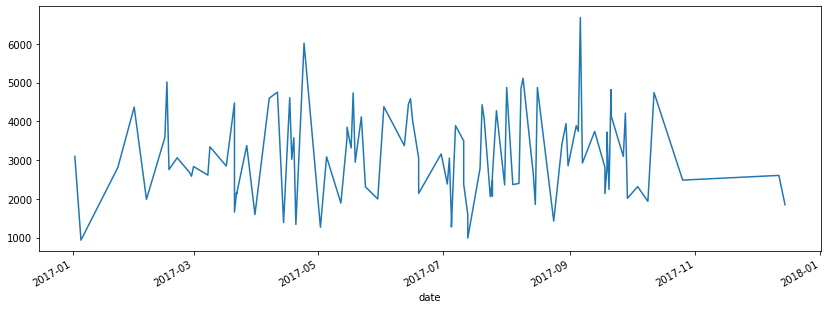

In [39]:
receipts_df['amount'].plot(figsize=(14,5))

In [41]:
for index, row in receipts_df.iterrows():
    receipts_df.loc[index, ['amount_per_quantity']] = row['amount']/row['quantity']

<AxesSubplot:xlabel='date'>

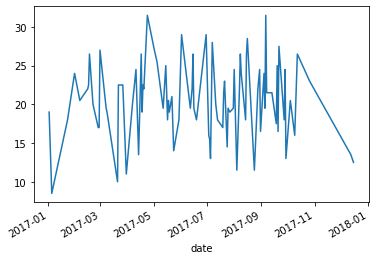

In [43]:
receipts_df['amount_per_quantity'].plot()